In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from plsr.analysis import *
from plsr.outliers import MonteCarloOutliers

In [2]:
from curvefit import DatasetSpectra

2024-08-20 15:19:28.103508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 15:19:28.116694: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 15:19:28.120298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from boxsers.preprocessing import rubberband_baseline_cor

In [4]:
file_path = '~/data/dataset_294.csv'
domain_path = '~/data/domain.csv'

# file_path = '~/data/dataset_565.csv'
# domain_path = '~/data/dataset_565_domain.csv'

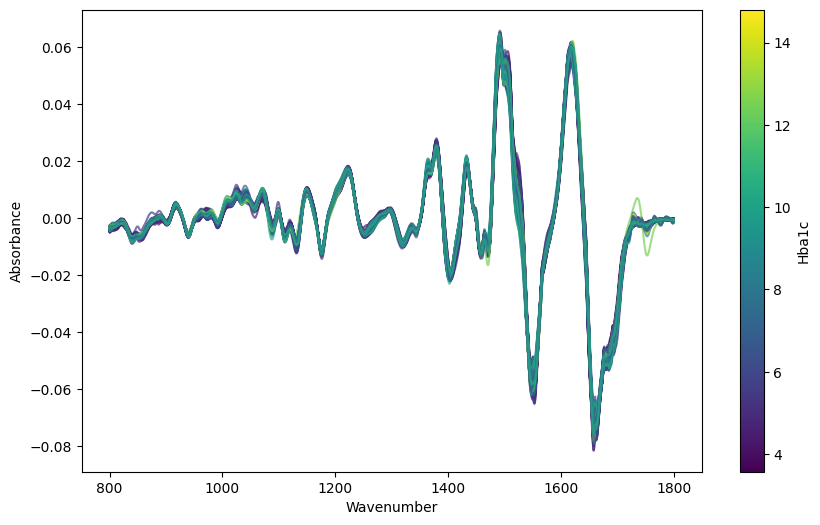

In [5]:
dataset = DatasetSpectra(file_path, domain_path)
# dataset.select_max_abs(0.3)
# dataset.baseline_corr()
dataset.savgol_filter(window_length=32, polyorder=2, deriv=1)
dataset.normalization(kind='vector')
dataset.select_region(800, 1800)
dataset.plot_spectra()

In [6]:
print(dataset.n_samples)

294


In [7]:
X = dataset.spectra
y = dataset.hba1c
# scaler = StandardScaler()
# y = scaler.fit_transform(y.reshape(-1, 1)).ravel()

<Axes: ylabel='Count'>

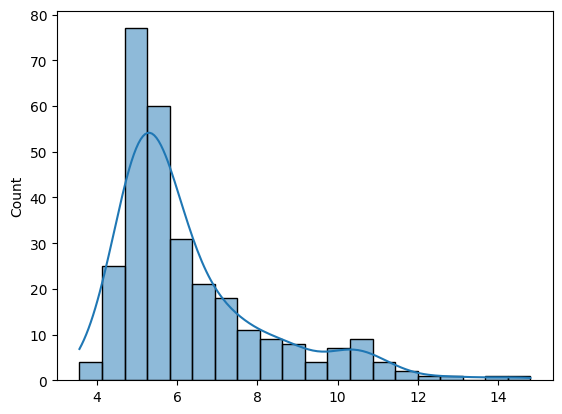

In [8]:
sns.histplot(y, kde=True)

In [9]:
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None, random_state=4)
categories = discretizer.fit_transform(y.reshape(-1, 1))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=categories, random_state=44)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Text(0.5, 0, 'HbA1c')

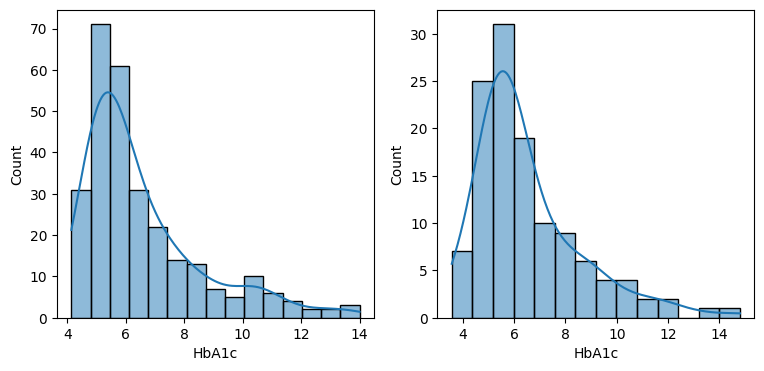

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
sns.histplot(y_train, ax=axs[0], kde=True)
sns.histplot(y_test, ax=axs[1], kde=True)

axs[0].set_xlabel('HbA1c')
axs[1].set_xlabel('HbA1c')

In [ ]:
# mntc = MonteCarloOutliers()
# mntc.fit(pd.DataFrame(X_train), y_train, ncomp=7, n_models=1000, test_size=0.2)
# mntc.plot_accumulative_means()

In [ ]:
# indicies = mntc.plot_samples(400, std_num=2)
# indicies

In [ ]:
# X_train = np.delete(X_train, indicies, axis=0)
# y_train = np.delete(y_train, indicies, axis=0)

print(X_train.shape)
print(y_train.shape)

(282, 2074)
(282,)


In [ ]:
# pd.DataFrame(X_train).to_csv('~/data/X_train.csv', index=None)
# pd.DataFrame(X_test).to_csv('~/data/X_test.csv', index=None)
# pd.DataFrame(y_train).to_csv('~/data/y_train.csv', index=None)
# pd.DataFrame(y_test).to_csv('~/data/y_test.csv', index=None)

┌──────────────────────────┐
│       FIT RESULTS        │
├──────────────────────────┤
│ RMSE = 1.2632            │
│ R2 = 0.6133              │
│ R = 0.7848               │
│ Number of components = 8 │
└──────────────────────────┘


(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: xlabel='Num of components', ylabel='$R^2$'>,
         <Axes: xlabel='Num of components', ylabel='RMSE'>],
        [<Axes: xlabel='y true', ylabel='y predicted'>,
         <Axes: xlabel='y predicted', ylabel='Residuals'>]], dtype=object))

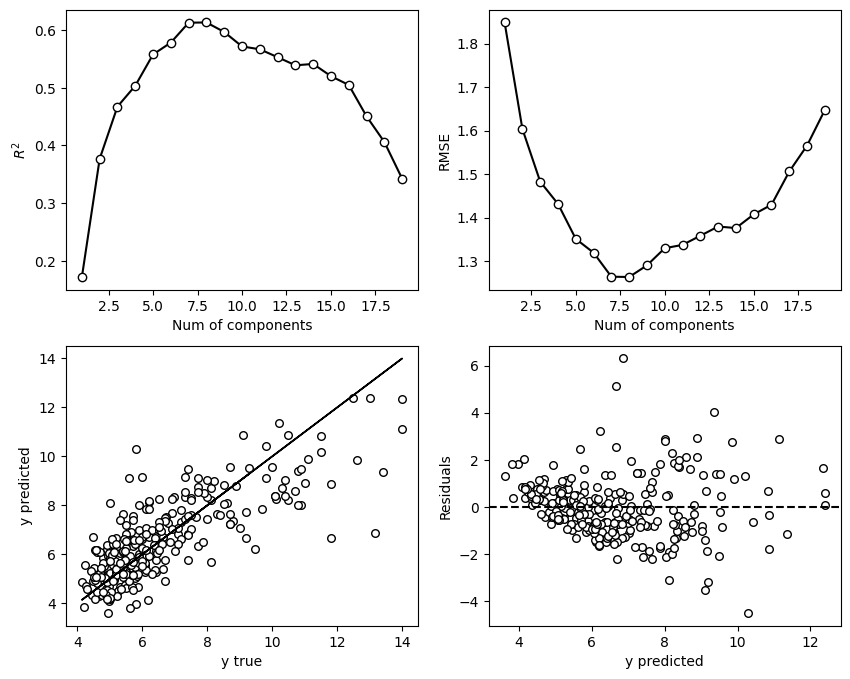

In [ ]:
plot_number_components(X_train, y_train, number_range=(1, 20), cv=7)

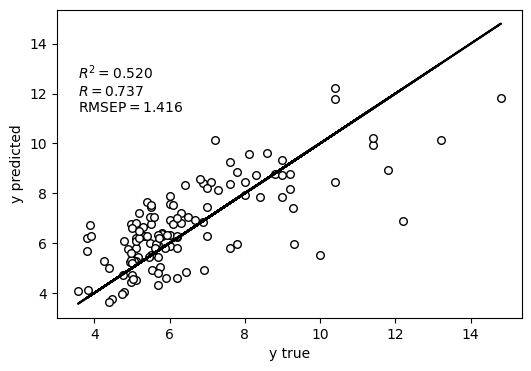

In [ ]:
pls = PLSRegression(n_components=7, scale=False)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
fig, axs = plsr_r2_plot(y_test, y_pred)

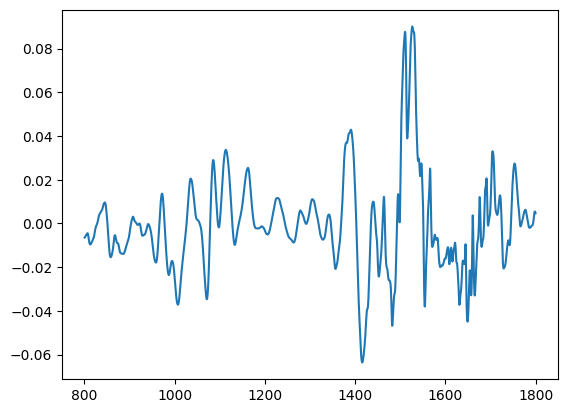

In [ ]:
plt.plot(dataset.wavenumbers, pls.x_weights_[:, 0])

In [ ]:
def explained_variance(model, y_train):
    r2_sum = 0
    for comp in range(0, model.n_components):
        y_pred = np.dot(model.x_scores_[:, comp].reshape(-1, 1), model.y_loadings_[:, comp].reshape(-1, 1).T) + y_train.mean(axis=0)
        r2_sum += round(r2_score(y_train, y_pred), 3)
        print('R2 for %d component: %g' %(comp + 1,round(r2_score(y_train, y_pred), 3)))
        print(f'R2 for all {comp + 1} components: {r2_sum}')
    
explained_variance(pls, y_train)

R2 for 1 component: 0.192
R2 for all 1 components: 0.192
R2 for 2 component: 0.225
R2 for all 2 components: 0.41700000000000004
R2 for 3 component: 0.091
R2 for all 3 components: 0.508
R2 for 4 component: 0.043
R2 for all 4 components: 0.551
R2 for 5 component: 0.076
R2 for all 5 components: 0.627
R2 for 6 component: 0.034
R2 for all 6 components: 0.661
R2 for 7 component: 0.029
R2 for all 7 components: 0.6900000000000001
